In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('CarsData.csv')
df.drop("Unnamed: 0", axis =1 , inplace = True)
df.head() # first 5 rows of the dataset

,Name,Year,kms_Driven,Fuel_Type,Transmission,Owner_Type,Power,Engine,mileage,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,58.16,998.0,26.60,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,126.20,1582.0,19.67,5.0,NaN,12.50
2,Honda Jazz V,2011,46000,Petrol,Manual,First,88.70,1199.0,18.20,5.0,8.61,4.50
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,88.76,1248.0,20.77,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,140.80,1968.0,15.20,5.0,NaN,17.74


In [3]:
df.describe()    # Statistical summaries of the numerical variables.

,Year,kms_Driven,Power,Engine,mileage,Seats,New_Price,Price
count,6019.000000,6.019000e+03,6019.000000,5983.000000,6017.000000,5977.000000,824.000000,6019.000000
mean,2013.358199,5.873838e+04,112.883539,1621.276450,18.134961,5.278735,20.320716,9.479468
std,3.269742,9.126884e+04,53.283701,601.355233,4.582289,0.808840,20.198119,11.187917
min,1998.000000,1.710000e+02,34.200000,72.000000,0.000000,0.000000,1.000000,0.440000
25%,2011.000000,3.400000e+04,78.000000,1198.000000,15.170000,5.000000,7.845000,3.500000
50%,2014.000000,5.300000e+04,97.700000,1493.000000,18.150000,5.000000,11.415000,5.640000
75%,2016.000000,7.300000e+04,138.030000,1984.000000,21.100000,5.000000,24.010000,9.950000
max,2019.000000,6.500000e+06,560.000000,5998.000000,33.540000,10.000000,99.920000,160.000000


Name               0
Year               0
kms_Driven         0
Fuel_Type          0
Transmission       0
Owner_Type         0
Power              0
Engine            36
mileage            2
Seats             42
New_Price       5195
Price              0
dtype: int64


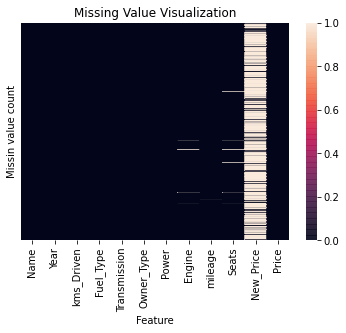

In [4]:
# checking for null values: 
print(df.isnull().sum())
sns.heatmap(df.isnull(), yticklabels=False, alpha = 0.7)
plt.title("Missing Value Visualization")
plt.xlabel("Feature")
plt.ylabel("Missin value count")
plt.show()

In [5]:
categorical_features = [feature for feature in df.columns if feature != 'Name' and df[feature].dtype == 'O']
numerical_features = [feature for feature in df.columns if feature != 'Name' and feature not in categorical_features]
print("Numerical Features: ",numerical_features)
print("Categorical Features: ", categorical_features)

Numerical Features:  ['Year', 'kms_Driven', 'Power', 'Engine', 'mileage', 'Seats', 'New_Price', 'Price']
Categorical Features:  ['Fuel_Type', 'Transmission', 'Owner_Type']


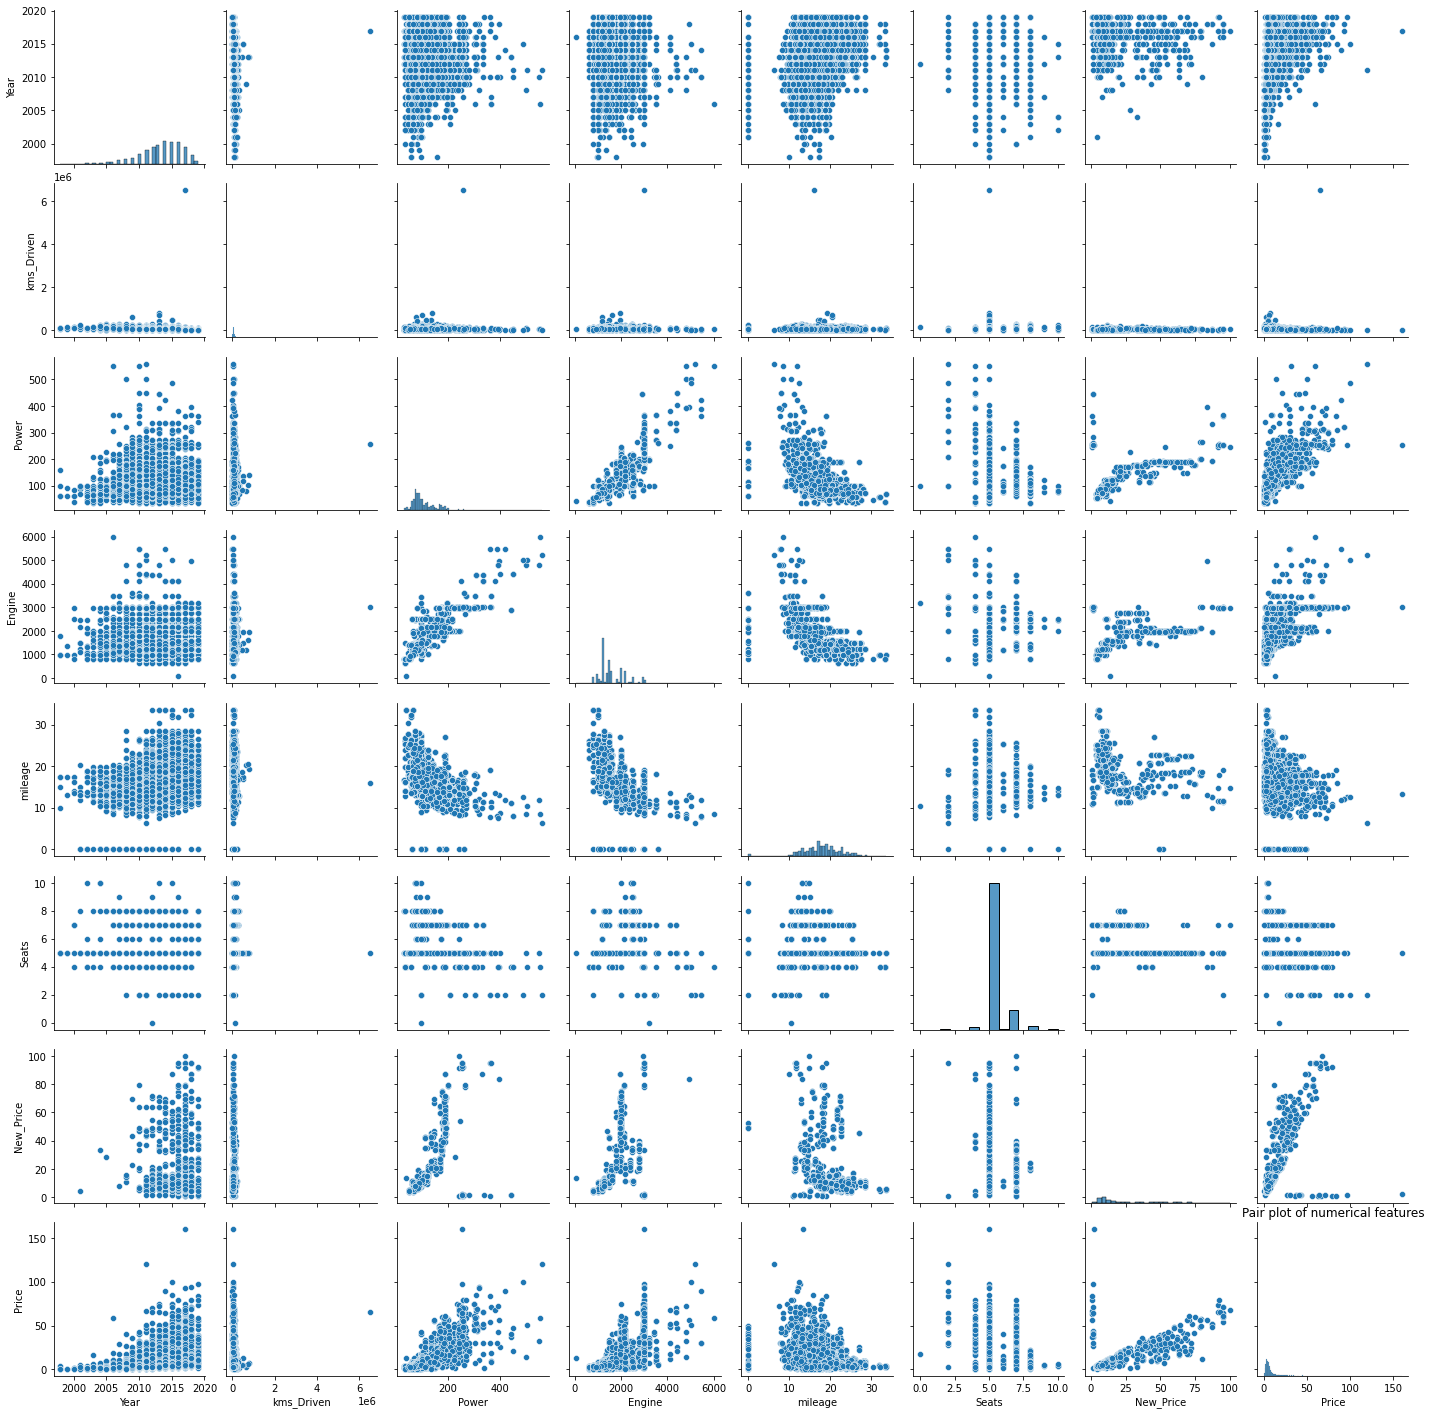

In [6]:
sns.pairplot(df[numerical_features])
plt.title("Pair plot of numerical features")
plt.show()

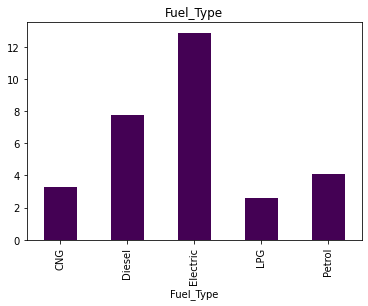

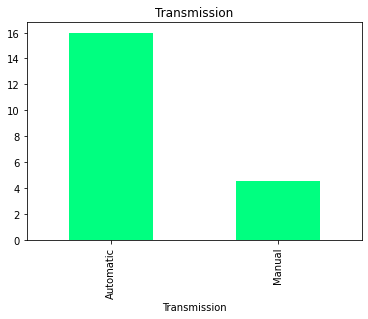

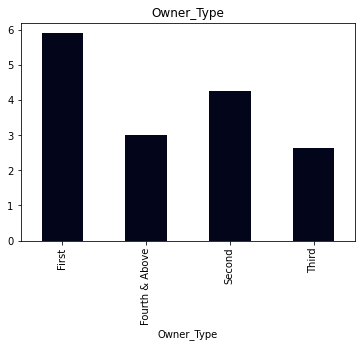

In [10]:
for i,feature in enumerate(categorical_features): 
    colors = ['viridis','winter_r','rocket','twilight']
    df.groupby(feature)['Price'].median().plot.bar(cmap= colors[i])
    plt.title(feature)
    plt.show()

In [11]:
print("Correlation Matrix:\n ")
df.corr()


Correlation Matrix:
 


,Year,kms_Driven,Power,Engine,mileage,Seats,New_Price,Price
Year,1.000000,-0.173048,0.024195,-0.052197,0.321565,0.012333,-0.011245,0.305327
kms_Driven,-0.173048,1.000000,0.032080,0.091068,-0.065253,0.083113,0.003989,-0.011493
Power,0.024195,0.032080,1.000000,0.860372,-0.497763,0.101857,0.716383,0.769711
Engine,-0.052197,0.091068,0.860372,1.000000,-0.597699,0.393337,0.608418,0.658354
mileage,0.321565,-0.065253,-0.497763,-0.597699,1.000000,-0.308226,-0.328595,-0.306593
Seats,0.012333,0.083113,0.101857,0.393337,-0.308226,1.000000,-0.014578,0.052225
New_Price,-0.011245,0.003989,0.716383,0.608418,-0.328595,-0.014578,1.000000,0.686588
Price,0.305327,-0.011493,0.769711,0.658354,-0.306593,0.052225,0.686588,1.000000


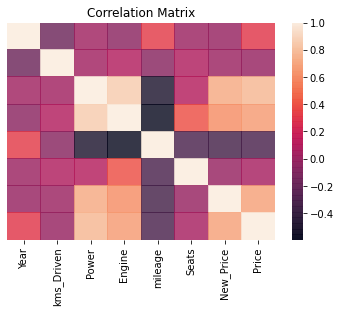

In [12]:
sns.heatmap(df.corr(), yticklabels=False,cmap = 'rocket', alpha = 0.8)
plt.title("Correlation Matrix")
plt.show()

In [13]:
keys =[]
vals = []
for feature in numerical_features: 
    keys.append(feature)
    vals.append(df['Price'].corr(df[feature]))


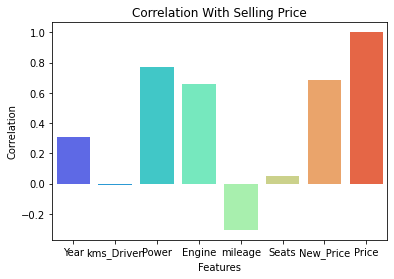

In [16]:
sns.barplot(keys,vals,palette='rainbow')
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation With Selling Price")
plt.show()

Conclusion: 
Categorical Varaibles: 
The dependency between the all the categorical features and Selling Price is significant. 
Numerical Features: 
The correlation between some numerical features such as present price and selling price are high, where as the correlation 
between owner and selling price is very less. (Hence we may or may not include these features during modelling)

# Data Preprocessing

1. Handling Missing Values

In [17]:
# Since the New Price column contains very high percentage of missing values, it can be dropped
df.drop('New_Price', axis = 1, inplace = True)
mode_seats = int(df['Seats'].mode())
med_Engine = df['Engine'].median()
med_mileage = df['mileage'].median()
df.fillna({
    "Seats":mode_seats, 
    "Engine": med_Engine,        
    "mileage": med_mileage
}, inplace = True)
df.isnull().sum()

Name            0
Year            0
kms_Driven      0
Fuel_Type       0
Transmission    0
Owner_Type      0
Power           0
Engine          0
mileage         0
Seats           0
Price           0
dtype: int64

2. Outlier Detection and Removal

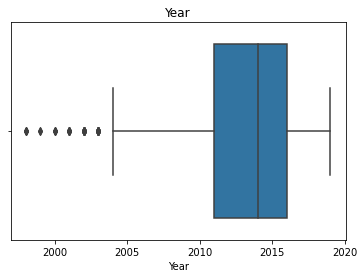

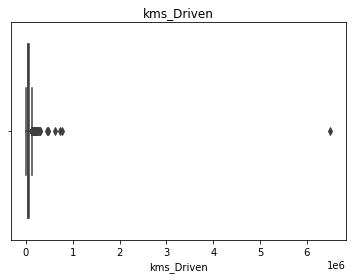

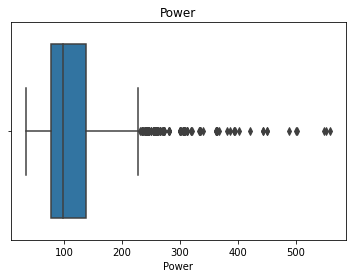

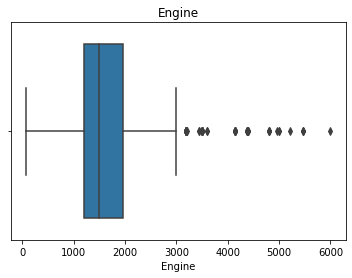

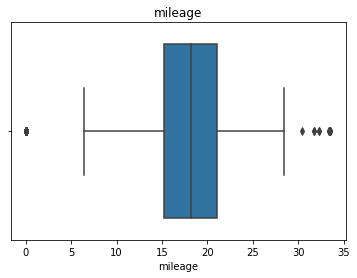

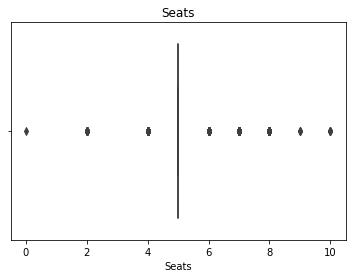

In [18]:
for feature in numerical_features:
    if feature != "New_Price" and feature != 'Price':
        sns.boxplot(df[feature])
        plt.title(feature)
        plt.show()


In [19]:
# Removing the outliers using Quantile Method. 
min_vals = []
max_vals= []
for feature in ['Seats','mileage','Power','Engine','kms_Driven']:
    min_vals.append(df[feature].quantile(0.05))
    max_vals.append(df[feature].quantile(0.95))
num_feat=['Seats','mileage','Power','Engine','kms_Driven']
for i,feature in enumerate(num_feat):
    df = df[(df[feature] <= max_vals[i]) & (df[feature] >= min_vals[i])]
df.shape

(4318, 11)

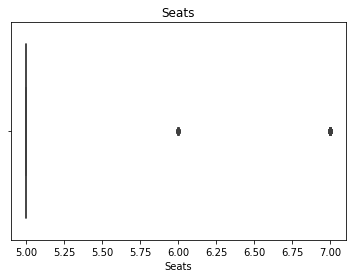

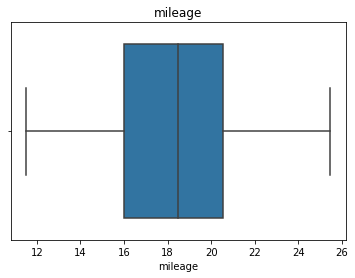

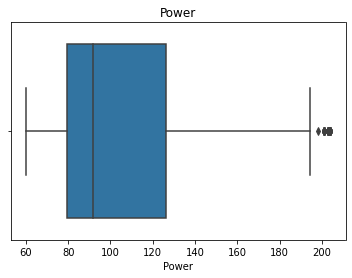

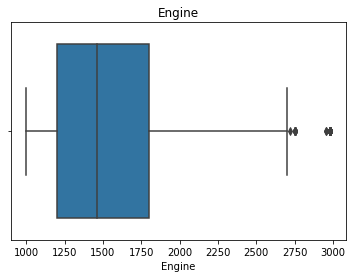

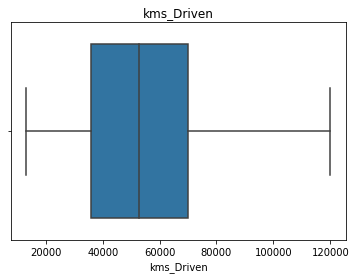

In [20]:
for feature in num_feat:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

Now we can clearly see that the outliers are handled.

3. Feature Scaling and Encoding

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
df[['Engine','kms_Driven']] = scaler.fit_transform(df[['Engine','kms_Driven']])
df.head()
# Since the range of Engine and KMS_Driven features are very high we will scale the features between 0 to 5

,Name,Year,kms_Driven,Fuel_Type,Transmission,Owner_Type,Power,Engine,mileage,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,2015,1.308135,Diesel,Manual,First,126.20,1.471774,19.67,5.0,12.50
2,Honda Jazz V,2011,1.541798,Petrol,Manual,First,88.70,0.506552,18.20,5.0,4.50
3,Maruti Ertiga VDI,2012,3.457829,Diesel,Manual,First,88.76,0.630040,20.77,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,1.292713,Diesel,Automatic,Second,140.80,2.444556,15.20,5.0,17.74
6,Nissan Micra Diesel XV,2013,3.457782,Diesel,Manual,First,63.10,1.166835,23.08,5.0,3.50


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Owner_Type'] = encoder.fit_transform(df[['Owner_Type']])
df['Transmission'] = encoder.fit_transform(df[['Transmission']])
df.head()


,Name,Year,kms_Driven,Fuel_Type,Transmission,Owner_Type,Power,Engine,mileage,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,2015,1.308135,Diesel,1,0,126.20,1.471774,19.67,5.0,12.50
2,Honda Jazz V,2011,1.541798,Petrol,1,0,88.70,0.506552,18.20,5.0,4.50
3,Maruti Ertiga VDI,2012,3.457829,Diesel,1,0,88.76,0.630040,20.77,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,1.292713,Diesel,0,2,140.80,2.444556,15.20,5.0,17.74
6,Nissan Micra Diesel XV,2013,3.457782,Diesel,1,0,63.10,1.166835,23.08,5.0,3.50


In [23]:
# Implementing one hot encoding on Fuel Type column
ft = pd.get_dummies(df['Fuel_Type'], drop_first=True)
df.drop('Fuel_Type', axis = 1, inplace = True)
df = pd.concat([df,ft], axis =1)
df.head()

,Name,Year,kms_Driven,Transmission,Owner_Type,Power,Engine,mileage,Seats,Price,Diesel,Electric,LPG,Petrol
1,Hyundai Creta 1.6 CRDi SX Option,2015,1.308135,1,0,126.20,1.471774,19.67,5.0,12.50,1,0,0,0
2,Honda Jazz V,2011,1.541798,1,0,88.70,0.506552,18.20,5.0,4.50,0,0,0,1
3,Maruti Ertiga VDI,2012,3.457829,1,0,88.76,0.630040,20.77,7.0,6.00,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,1.292713,0,2,140.80,2.444556,15.20,5.0,17.74,1,0,0,0
6,Nissan Micra Diesel XV,2013,3.457782,1,0,63.10,1.166835,23.08,5.0,3.50,1,0,0,0


# Model Development

1. Data Splitting and Model Fitting

In [24]:
# Splitting the dataset into train test split
X = df.drop('Price', axis =1)
X.drop('Name',axis = 1, inplace = True)
Y = df[['Price']]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state= 0)
print("Test Size\t", len(x_test))
print("Train Size\t", len(x_train))


Test Size	 864
Train Size	 3454


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
models = [LinearRegression(), RandomForestRegressor(),SVR(),DecisionTreeRegressor(),GradientBoostingRegressor(), AdaBoostRegressor()\
    ,ExtraTreesRegressor()]
for model in models: 
    model.fit(x_train,y_train)
    print(model)
    print("Accuracy on training set: ", model.score(x_train,y_train))
    print("Accuracy on testing set: ", model.score(x_test,y_test))
    

LinearRegression()
Accuracy on training set:  0.7244188007395889
Accuracy on testing set:  0.7040444327186022
RandomForestRegressor()
Accuracy on training set:  0.9887279475772657
Accuracy on testing set:  0.8990447873861951
SVR()
Accuracy on training set:  0.12531335172121905
Accuracy on testing set:  0.13243166399885864
DecisionTreeRegressor()
Accuracy on training set:  0.9999005223915746
Accuracy on testing set:  0.824876497615901
GradientBoostingRegressor()
Accuracy on training set:  0.9360995250727177
Accuracy on testing set:  0.9000012099540042
AdaBoostRegressor()
Accuracy on training set:  0.7232613138322944
Accuracy on testing set:  0.6734165884673464
ExtraTreesRegressor()
Accuracy on training set:  0.9999005223915746
Accuracy on testing set:  0.8887795771896516


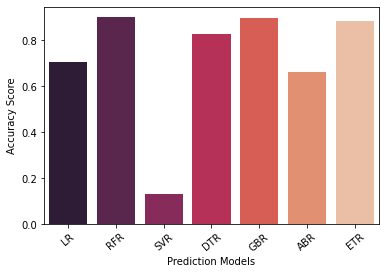

In [26]:
accuracy = []
models_ = ['LR','RFR','SVR','DTR','GBR','ABR','ETR']
for mod in models: 
    mod.fit(x_train,y_train)
    accuracy.append(mod.score(x_test,y_test))
sns.barplot(models_,  accuracy, palette = 'rocket')
plt.xticks(rotation = 40)
plt.ylabel("Accuracy Score")
plt.xlabel("Prediction Models")
plt.show()

From the above Regressors the regressor having the best accuracy is Random Forest Regressor with an acccuracy of 0.998 on training set and 0.895 on testing set

In [27]:
rf_model = RandomForestRegressor(n_estimators=100, criterion='mae')
rf_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mae')

In [28]:
# Prediction: 
def prediction(new_sample):
    prediction = rf_model.predict([new_sample])
    return ("The Predicted Sale Price is : {} ".format(prediction) )
prediction(x_test.loc[743])

'The Predicted Sale Price is : [5.2779] '

# Model Evaluation

In [29]:
y_true = y_test 
y_pred = rf_model.predict(x_test)

In [30]:
from sklearn.metrics import  accuracy_score,mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)
acc = rf_model.score(x_test,y_test)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Accuracy Score: ", acc)

Mean Squared Error:  5.988050424545712
Mean Absolute Error:  1.2520588541666664
Accuracy Score:  0.9023550844074767


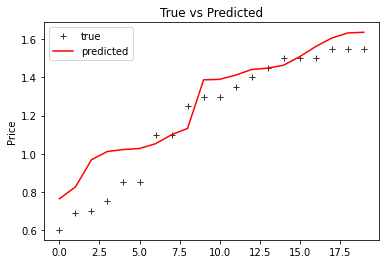

In [32]:
y_true = y_true.sort_values('Price',ascending = True)
y_true_sorted = y_true.values.flatten()[0:20]
y_pred_sorted = sorted(y_pred)[0:20]
plt.plot(y_true_sorted,'+',c = 'black',alpha = 0.8,label = 'true')
plt.plot(y_pred_sorted,label = 'predicted',c = 'red')
plt.title("True vs Predicted")
plt.ylabel("Price")
plt.legend()
plt.show()